# Knowledge Base

This is the part of the expert system where the expert knowledge is stored. It is divided into 5 parts:

1. Machine overview
2. Controllable process parameters
3. Energy perfomance indicators (EnPIs)
4. Fuzzy rule base 
5. Data points of parameters

#### 1. Machine overview
![](../figures/TPCM.jpg)
[For more information click here](https://www.ptw.tu-darmstadt.de/institut_ptw/aktuelles_ptw/aktuelleslist_details_486464.en.jsp)


#### 2. Controllable process parameters [Click here to implement](#data_points)
| Consumer | Function | Parameter | Technological range | 
|:--------|:--------| :--------| :--------|
|  Fluid heater   |  Heat cleaning and rinsing fluid | Fluid temperature $T_{cleaning}$ in °C   |  (40 – 70) °C |
|  Cleaning fluid  pump |  Wash parts with fluid | Cleaning pump pressure $p_{cleaning}$ in bar   |  (0.05 – 2.3) bar |
|  Rinsing fluid  pump  |  Rinse parts with  fluid | Rinsing pump pressure $p_{rinsing}$ in bar   |  (0.05 – 2.3) bar |
|  Heating register |  Heat drying air  | Drying air temperature $T_{drying}$ in °C   |  (45 – 115) °C |
|  Drying fan |  Transfer heat and moisture | Drying fan speed $n_{drying}$ in rpm   |  (860-3300) rpm |


#### 3. Energy perfomance indicators (EnPIs)
| EnPI |  Formula | Unit |
|:--------|:--------|:--------|
|  Savings potential  |   $\Delta \overline{P}_{i} = \overline{P}_i(V_{CPP})-\overline{P}_i(V_{CPP,opt})$ | W |
|  Normalized savings potential  |   $\Delta \overline{p}_{i} = \frac{\Delta \overline{P}_{i}}{\Delta \overline{P}_{\text{max}}-\Delta \overline{P}_{\text{min}}}$| 1 |
|  Optimization potential  |   $o_{CPP} = \frac{|V_{CPP}-V_{CPP,opt}|}{V_{CPP,max}-V_{CPP,min}}$ | 1 |


#### 4.Fuzzy rule base 
If the rules in the following table are changed, please also adjust the implementation. [Clicke here to change the implementation of the rule base.](UserInterface.ipynb) The rule base is defined in such a way that measures in which small adjustments to a CPV lead to large energy savings are prioritized.

| Rule number | Antecedent | Consequent 
|:--------|:--------|:--------|
|  1  |  $\Delta \overline{p}_{i}$ is high AND $o_{CPP}$ is low  |  $Z_{CPP}$ is high|
|  2  |  $\Delta \overline{p}_{i}$ is medium AND $o_{CPP}$ is low  |  $Z_{CPP}$ is medium|
|  3  |  $\Delta \overline{p}_{i}$ is low AND $o_{CPP}$ is low  |  $Z_{CPP}$ is medium|
|  4  |  $\Delta \overline{p}_{i}$ is high AND $o_{CPP}$ is medium  |  $Z_{CPP}$ is medium|
|  5  |  $\Delta \overline{p}_{i}$ is medium AND $o_{CPP}$ is medium  |  $Z_{CPP}$ is medium|
|  6  |  $\Delta \overline{p}_{i}$ is low AND $o_{CPP}$ is medium  |  $Z_{CPP}$ is medium|
|  7  |  $\Delta \overline{p}_{i}$ is high AND $o_{CPP}$ is high  |  $Z_{CPP}$ is medium|
|  8  |  $\Delta \overline{p}_{i}$ is medium AND $o_{CPP}$ is high  |  $Z_{CPP}$ is medium|
|  9  |  $\Delta \overline{p}_{i}$ is low AND $o_{CPP}$ is high  |  $Z_{CPP}$ is low|


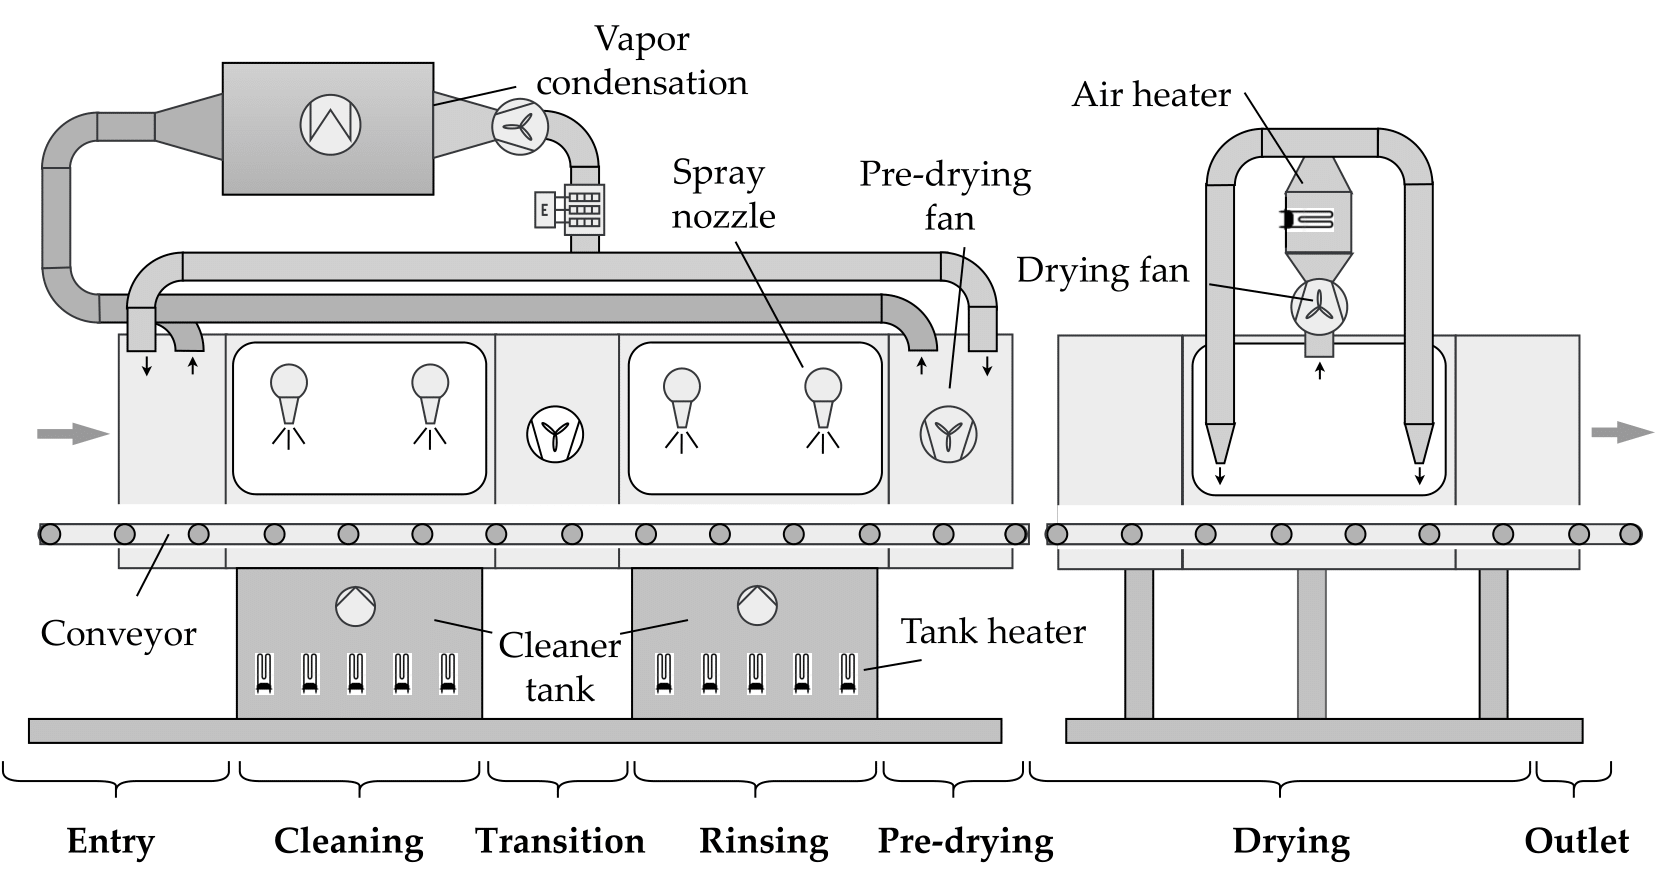

#### 5. Data points of parameters <a id='data_points'></a>

In [1]:
# Specify the OPC UA server URL
server_url = "opc.tcp://000.000.000.000:4840"

# Specify the NodeIDs 
node_ids_dict = {
    'T_cleaning': 'ns=4;s=MAIN.VarPOU_LoTuS.LoTuS.DAK.BvL_Tanks.BvL_Tank_RZ.Tankheizung.Heizstaebe.Heiz_Soll_Elekt.setPointState.fSetPoint',
    'p_cleaning': 'ns=4;s=MAIN.VarPOU_LoTuS.LoTuS.DAK.BvL_p_RZ_VF.sensorState.fValue',
    'T_rinsing': 'ns=4;s=MAIN.VarPOU_LoTuS.LoTuS.DAK.BvL_Tanks.BvL_Tank_SZ.Tankheizung.Heizstaebe.Heiz_Soll_Elekt.setPointState.fSetPoint',
    'p_rinsing': 'ns=4;s=MAIN.VarPOU_LoTuS.LoTuS.DAK.BvL_p_SZ_VF.sensorState.fValue',
    'T_drying': 'ns=4;s=MAIN.VarPOU_LoTuS.LoTuS.Trocknung.UL.BvL_Heiz_UL.setPointState.fSetPoint',
    'n_drying': 'ns=4;s=MAIN.VarPOU_LoTuS.LoTuS.Trocknung.UL.BvL_L_UL.setPointState.fOperatingPoint',
}

#%store server_url
#%store node_ids_dict

In [2]:
%store server_url
%store node_ids_dict

Stored 'server_url' (str)
Stored 'node_ids_dict' (dict)
